# [E-15] 한국어 대화형 챗봇만들기

# 개념이해

# 목차

Step 1. 데이터 수집하기

Step 2. 데이터 전처리하기

Step 3. SubwordTextEncoder 사용하기

Step 4. 모델 구성하기

Step 5. 모델 평가하기

# Step 1. 데이터 수집하기

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print("슝=3")

슝=3


In [ ]:
# data = pd.read_csv('/home/aiffel-dj54/aiffel/aiffel_exp_data/ChatbotData .csv')
# path_to_dataset = os.path.join(
#     os.path.dirname(data))

# path_to_movie_lines = os.path.join(path_to_dataset, 'Q.txt')
# path_to_movie_conversations = os.path.join(path_to_dataset,'A.txt')
# print("슝=3")

In [2]:
data=pd.read_csv('/home/aiffel-dj54/aiffel/aiffel_exp_data/ChatbotData .csv')
data
#print(data) #표 형식이 아닌 데이터만 뜬다

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [3]:
data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


In [4]:
data.tail()

,Q,A,label
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2
11822,힘들어서 결혼할까봐,도피성 결혼은 하지 않길 바라요.,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11823 entries, 0 to 11822
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q       11823 non-null  object
 1   A       11823 non-null  object
 2   label   11823 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 277.2+ KB


In [6]:
data.shape #11823행 3열 

(11823, 3)

In [7]:
data.columns #label은 사용안함

Index(['Q', 'A', 'label'], dtype='object')

# Step 2. 데이터 전처리하기(cleaning)
* 결측치 제거, 중복데이터 제거, 구둣점제거, 불용어제거

* 정규화, 토큰화, 정규화

## 정제&정규화

In [8]:
print('전체 데이터 건수:', len(data))

전체 데이터 건수: 11823


In [9]:
print('컬럼별 결측치 개수')
len(data) - data.count() #Q = INPUT, A = OUTPUT

컬럼별 결측치 개수


Q        0
A        0
label    0
dtype: int64

In [10]:
data.isnull() #각행에 결측치가 있으면 true 없으면 false

,Q,A,label
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
11818,False,False,False
11819,False,False,False
11820,False,False,False
11821,False,False,False


In [11]:
#dropna 결측치 삭제
data.dropna(how='all')

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [12]:
data.duplicated() #중복데이터 여부

0        False
1        False
2        False
3        False
4        False
         ...  
11818    False
11819    False
11820    False
11821    False
11822    False
Length: 11823, dtype: bool

In [13]:
data.drop_duplicates(inplace=True)
print("중복된 데이터 삭제")

중복된 데이터 삭제


In [14]:
# 사용할 샘플의 최대 개수
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


정규표현식 모듈함수 = re.sub() 문자열에서 정규표현식과 일치하는 부분을 다른 문자열로 대체합니다.

In [15]:
def preprocess_sentence(sentence):
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence) #구두점은 \1칸 공백을 준다.
    sentence = re.sub(r'[" "]+', " ", sentence)       #
    print(sentence)    
    #[^ ㄱ-ㅣ가-힣]+
    sentence = re.sub(r"[^ ㄱ-ㅣ가-힣]+", " ", sentence)  # [^가-힣]에 해당하는 부분은 공백으로 처리한다.
    sentence = sentence.strip()
    return sentence
print("슝=3")

슝=3


In [16]:
text="한국!...핳안녕"
result=preprocess_sentence(text)
print(result)

한국 ! . . . 핳안녕
한국         핳안녕


In [17]:
# 질문과 답변의 쌍인 데이터셋을 구성하기 위한 데이터 로드 함수
#zip 함수 동일한 개수인 자료형을 묶어주는 함수
# 
def load_conversations():
    inputs, outputs = [], []
    for q,a in zip(data['Q'],data['A']):
        inputs.append(preprocess_sentence(q))
        outputs.append(preprocess_sentence(a))
                
        if len(inputs) >= MAX_SAMPLES:
            return inputs, outputs
#             print(inputs,outputs)
    return inputs, outputs
print("슝=3")

슝=3


In [18]:
# 데이터를 로드하고 전처리하여 질문을 questions, 답변을 answers에 저장합니다.
questions, answers = load_conversations()
print('전체 샘플 수 :', len(questions))
print('전체 샘플 수 :', len(answers))

12시 땡 ! 
하루가 또 가네요 . 
1지망 학교 떨어졌어
위로해 드립니다 . 
3박4일 놀러가고 싶다
여행은 언제나 좋죠 . 
3박4일 정도 놀러가고 싶다
여행은 언제나 좋죠 . 
PPL 심하네
눈살이 찌푸려지죠 . 
SD카드 망가졌어
다시 새로 사는 게 마음 편해요 . 
SD카드 안돼
다시 새로 사는 게 마음 편해요 . 
SNS 맞팔 왜 안하지ㅠㅠ
잘 모르고 있을 수도 있어요 . 
SNS 시간낭비인 거 아는데 매일 하는 중
시간을 정하고 해보세요 . 
SNS 시간낭비인데 자꾸 보게됨
시간을 정하고 해보세요 . 
SNS보면 나만 빼고 다 행복해보여
자랑하는 자리니까요 . 
가끔 궁금해
그 사람도 그럴 거예요 . 
가끔 뭐하는지 궁금해
그 사람도 그럴 거예요 . 
가끔은 혼자인게 좋다
혼자를 즐기세요 . 
가난한 자의 설움
돈은 다시 들어올 거예요 . 
가만 있어도 땀난다
땀을 식혀주세요 . 
가상화폐 쫄딱 망함
어서 잊고 새출발 하세요 . 
가스불 켜고 나갔어
빨리 집에 돌아가서 끄고 나오세요 . 
가스불 켜놓고 나온거 같아
빨리 집에 돌아가서 끄고 나오세요 . 
가스비 너무 많이 나왔다 . 
다음 달에는 더 절약해봐요 . 
가스비 비싼데 감기 걸리겠어
따뜻하게 사세요 ! 
가스비 장난 아님
다음 달에는 더 절약해봐요 . 
가장 확실한 건 뭘까 ? 
가장 확실한 시간은 오늘이에요 . 어제와 내일을 놓고 고민하느라 시간을 낭비하지 마세요 . 
가족 여행 가기로 했어
온 가족이 모두 마음에 드는 곳으로 가보세요 . 
가족 여행 고고
온 가족이 모두 마음에 드는 곳으로 가보세요 . 
가족 여행 어디로 가지 ? 
온 가족이 모두 마음에 드는 곳으로 가보세요 . 
가족 있어 ? 
저를 만들어 준 사람을 부모님 , 저랑 이야기해 주는 사람을 친구로 생각하고 있어요
가족관계 알려 줘
저를 만들어 준 사람을 부모님 , 저랑 이야기해 주는 사람을 친구로 생각하고 있어요
가족끼리 여행간다 . 
더 가까워질 기회가 되겠네요 . 
가족들 보고 싶어
저도요 . 
가족들이랑 서먹해

모르는 번호에서 전화오면 ? 
받지마세요 . 
모르는 사람 만나는거 너무 스트레스야
자신과 마음이 맞는 좋은 사람 만나세요 . 
모르는 사람들이 페친 신청해
세상에는 예상하지 못한 일들이 자주 일어나는 것 같아요 . 
모르는 사람이 자꾸 쳐다봐
혹시 반한 걸 수도 있어요 . 
모른 척 하는 건지 모르는 건지
진짜 모르는 걸 수도 있어요 . 
모른 척 하는건가
진짜 모르는 걸 수도 있어요 . 
모른척 지나쳤어
그게 서로에게 좋았던 선택일 거예요 . 
모른척 해줬어
그게 서로에게 좋았던 선택일 거예요 . 
모임에서 만났어
꿩 먹고 알 먹고네요 . 
목 마르다 . 
물 마시세요 . 
목 말라
물 마시세요 . 
목 아파
가끔씩 스트레칭을 해주세요 . 
목 탄다
물 드세요 . 
목걸이 선물이 좋겠다 . 
로맨틱하네요 . 
목걸이 선물해볼까 ? 
로맨틱하네요 . 
목돈 만들기
저도 좀 알려주세요 . 
목소리 좋은 사람이 좋아
저도 듣고 싶네요 . 
목욕탕 가서 때밀어야겠다 . 
시원하게 씻고 오세요 . 
목욕탕 가야지
시원하게 씻고 오세요 . 
목이 바싹바싹 탄다
물 드세요 . 
목이 뻐근해
가끔씩 스트레칭을 해주세요 . 
목이 뻑뻑해
목감기 오려나봐요 . 
목이 칼칼해
목감기 오려나봐요 . 
목표가 없어
목표는 있으면 좋겠지만 없다고 미리 걱정할 필요 없어요 . 생길 거예요 . 
목표가 없어서 걱정임
목표는 있으면 좋겠지만 없다고 미리 걱정할 필요 없어요 . 생길 거예요 . 
몰라서 당했어
다음부터는 더 많이 아세요 . 
몰랐구나
저도 몰랐어요 . 
몸매가 탄탄하면 좋은데
운동으로 만들어 보아요 . 
몸무게 좀 줄었으면
지금도 충분히 아름다워요 . 
몸살 감기에 걸릴 거 같아
따뜻하게 관리하세요 . 
몸살 나서 힘들어
아무 생각 하지 말고 쉬세요 . 
몸살 났나봐
아무 생각 하지 말고 쉬세요 . 
몸에 힘이 하나도 없어
자신의 감정을 주변 사람들에게 터놓고 이야기해보세요 . 
몸에서 멀어지면 맘에서도 멀어진데
장거리 연애 힘들겠죠 . 
몸이 무거워
피로를 풀어야 할 것

그 이유를 찾는 과정이 되겠네요 . 
왜 답장을 안하지
바쁜 상황일 수도 있어요 . 
왜 돈이 없지
쇼핑을 줄여보세요 . 
왜 때문에 나만 시키냐고
잘하니까 그럴 거 같아요 . 
왜 말을 못해 말을 못하냐구
노력하고 있는 중입니다 . 
왜 말을 이해를 못하냐구
노력하고 있는 중입니다 . 
왜 맨날 속는 건 나인거지 ? 
즐겁게 속아주세요 . 
왜 비난만 할까
성장을 위한 비판의 말로 받아들여보세요 . 
왜 살까
살아있음 자체로 의미가 있으니까요 . 
왜 서류에서 떨어지지 ? 
합격하는 곳이 있을 거예요 . 
왜 성적이 안오를까 ? 
나한테 맞는 공부 방법 찾는 게 시급하네요 . 
왜 싸웠는지도 기억 안나
그러니까 싸우는 거예요 . 
왜 안 하지
먼저 고백을 해보세요 . 
왜 이런 일이 일어날까
다른 사람도 그럴 거예요 . 
왜 이렇게 돈이 없지
슬프네요 . 
왜 이렇게 쓸쓸하지
친구를 사귀어 보세요 . 
왜 이렇게 태어났을까 ? 
서로 다르게 태어난 이유는 저마다의 목소리를 내기 위해서예요 . 자신의 목소리를 들어주세요 . 
왜 이상한 말 해
더 열심히 노력하겠습니다 . 
왜 이제 만나자고 했을까 ? 
이렇게 고민하게 만들려고 그랬나봐요 . 
왜 이제 찾는걸까 ? 
이렇게 고민하게 만들려고 그랬나봐요 . 
왜 이제서야 연락했을까 ? 
이렇게 고민하게 만들려고 그랬나봐요 . 
왜 이제서야 찾아온거야 ? 
이렇게 고민하게 만들려고 그랬나봐요 . 
왜 잠을 못 자는 걸까 ? 
생각이 너무 많아서 그런 것 같습니다 . 
왜 진급이 안 되지
열심히 하면 할 수 있을 거예요 . 
왜 카톡 답장을 안하지
바쁜 상황일 수도 있어요 . 
왤케 춥냐
따뜻하게 입으세요 . 
외국어 꼭 해야되나
좋은 도구죠 . 
외국어는 필수인가
좋은 도구죠 . 
외로워
친구를 사귀어 보세요 . 
외로워
혼자가 아니에요 . 
외모에 자신이 없어
자신감을 가져도 돼요 . 
외식 너무 많이 했다
다음달에는 조금 줄여보세요 . 
외제차 갖고 싶다
저도 타고 싶어요 . 
외제차 타고 싶어
저도 타고 싶어

남에게 피해주지 않는 건 기본이죠 . 
필기구 안가져 왔다 . 
빌리면 돼요 . 
필기하는거 힘들겠지
어깨 꾹꾹 해드리고 싶어요 . 
필름 끊겼었네
위험하네요 . 
필름 카메라 샀어
색감 참 좋겠네요 . 
필통 두고 옴
빌리면 돼요 . 
하 말 잘하는 애들 부러워
책을 많이 읽어보세요 . 
하객룩으로 뭐 입지 ? 
뭘 입어도 멋질 거예요 . 
하객이 없을 까봐 걱정돼
생각보다 신경 안 씁니다 . 
하고 싶은 게 없어
하면서 좋거나 재밌거나 잘하는게 있었는지 깊게 고민해보세요 . 
하고 싶은 게 없어
꼭 하고 싶은 게 있을 필요는 없어요 . 
하고 싶은 게 하나도 없어
꼭 하고 싶은 게 있을 필요는 없어요 . 
하고 싶은게 없어
하고싶었던 일을 글로 적어보세요 . 생각이 정리될 거예요 . 
하나부터 열까지 챙길게 너무 많아
열까지밖에 없네요 . 
하는 일 없이 피곤해
정신 노동을 했나 봐요 . 
하늘 나는 자동차 생겼으면
언젠가는 생기지 않을까요 . 
하늘 날 수 있는 차 생겼으면
언젠가는 생기지 않을까요 . 
하늘 본지가 언젠지
오늘은 쉬면서 보세요 . 
하늘 좀 보구 싶다 . 
오늘은 쉬면서 보세요 . 
하늘은 왜 내 편을 안 들어주지
다음에는 들어줄거예요 . 
하늘은 왜 내 편이 아닌 것 같아
다음에는 들어줄거예요 . 
하늘을 날고 싶어
오래 살면 가능할 거 같아요 . 
하라고 할때는 공부하기 싫었는데 . 
때를 놓쳐서 그런 것 같아요 . 
하루 종일 밀린 드라마 보고싶다 . 
저도요 ! 그게 제일 편한거 같아요 . 
하루 종일 아무것도 하기 싫어
아무것도 하지마세요 . 
하루를 효율적으로 보내고 싶어
한 시간 먼저 일어나보세요 . 
하루에 만보 걷기
좋은 건강습관이네요 . 
하루에 몇 번씩 헷갈리네
저도 매일 오락가락해요 . 
하루에도 몇 번씩 마음이 바뀌어
저도 매일 오락가락해요 . 
하루종일 맘 상한게 안풀려
좋은 일이 생길 거예요 . 
하루종일 속상해
좋은 일이 생길 거예요 . 
하루하루 늙어가
우리는 태어날 때부터 늙어가고 있어요 . 
하루하루가 

이별의 이유가 있을 테니까요 . 
다시 헤어졌습니다 . 
인연이 거기까지였나봐요 . 
다시 헤어진 직후로 돌아간거같아
정말 힘드신가봐요 . 
다시 힘들어지네 ㅠㅠ
힘든 건 익숙해지지가 않아요 . 
다시는 연락 안하고 잊어볼려구
꼭 그렇게 되실 거예요 . 
다시만나고싶어
후회하진 않을까 모르겠어요 . 
다음주가 너무 무서워
태연하게 기다릴 수 없겠네요 . 
다음주에 전 여자친구를 보기로 했어
마음이 복잡할 거 같아요 . 
다잊은것같다가도
다시 떠오르는 추억으로 힘들겠지만 이 과정 속에서 잘 잊을 수 있을 거예요 . 
다정했던 너는 이미 죽었다 . 
익숙함이 사람을 변하게 하나봐요 . 
담담하게 헤어졌어
헤어진 후에 자신을 더 돌봐주세요 . 
답 좀 줘
연락을 기다리고 있나봐요 . 
답답증
속 시원하게 털어버렸으면 좋을텐데요 . 
답답하네 . 뒤숭숭하고
아직 받아들여지지 않아서 그런가봐요 . 
답답하네 . 재회 하고 싶어
달라지지 않는다면 이대로가 나을지도 몰라요 . 
답답하다
많이 답답한가요 . 
답답한 마음
마음이 내 마음 같지 않죠
답답한 마음만 드는 내 사랑
사랑이 내 맘같으면 좋았을텐데 애석해요 . 
답답함
마음이 내 마음 대로 안 돼요 . 
답답해
가까운 곳으로 여행을 가보는 것도 좋을 거예요 . 
답답해 죽겠네 . 
바람이라도 쐬고 오는 건 어떨까요 . 
답답해서
좋은 생각만 하세요 . 
답변 조언 부탁드려 오랜연애 끈을놓을까 ? 
마음의 소리에 귀 기울여보세요 . 
답이 없는 과정
꼭 답을 풀어야 하는 건 아니에요 . 
답이 없는 남자
답이 얼른 왔으면 좋겠네요 . 
당신도 저만큼 아팠으면 좋겠습니다 . 
이런 말을 하면서 당신이 아프지 않았으면 좋겠어요 . 
당신이 너무 원망스럽습니다 . 
자신은 원망하지 마세요 . 
대체 뭘해야 머릿속에서 지울수 있을까 ? 
너무 빨리 지우려고 하면 더 안 지워져요 . 
대체 본심이 뭐라는 건데 . 
사람 마음은 알다가도 모르나봐요 . 
더 답답한 오늘
바람이라도 쐬고 오는 건 어떨까요 . 
더 많이 좋아하고 덜

그럼 새로운 인연을 기다려보세요 . 
이제 마음을 정리할 때가 된거같아
끝낼 때를 아는 것도 중요한 것 같아요 . 
이제 막 이별을 . 
혼자만의 시간이 필요하겠어요 . 
이제 모든게 퍼즐처럼 맞춰지네
곱씹어도 아픈 기억인 걸요 . 
이제 반년이란 시간이 흘렀는데
좀 나아졌길 기대합니다 . 
이제 밥도 잘 먹구 술은 안마시면 되겠는데
복잡한 머리 속이 문제네요 . 
이제 보내주려 합니다 . 
많이 고민 했을거라 생각해요 . 
이제 보름 다되어가네
생각 보다 잘 버텼어요 . 
이제 사진 지운 이유는 ? 
마음의 준비가 필요했을지도 몰라요 . 
이제 세달째
짧지 않은 시간이지요 . 
이제 숨 좀 쉬나
충분히 극복할 수 있어요 . 
이제 스스로 인정한 것 같아
현실 그대로를 받아들이는 것부터 시작이에요 . 
이제 슬슬 끝이 보이네
사랑에도 끝이 있으니까요 . 
이제 여친이 마음이 괜잖아진거같아 ! ! ! 
다행으로 생각할게요 . 
이제 와서 소문이라니
참 거지같네요 . 
이제 이곳올일 없을거 같네하하ㅜ
좋은 소식이라고 생각할게요 . 
이제 이별한지 한달
생각보다 많은 시간이 지났네요 . 
이제 인정해야할 것 같아 . 
현실 인정부터 시작이죠 . 
이제 일주일
충분히 극복해낼 수 있어요 . 
이제 일주일이네
당신만 아픈 것도 겪은 것도 아니에요 . 
이제 잊혀지는데 속도가 붙는거 같아 . 
이별도 익숨함에 젖어드나봐요 . 
이제 자리 잡아가는데
얼마 남지 않았어요 . 
이제 전부 못믿겠네 . 
그래도 자신은 믿어주세요 . 
이제 점심시간에도 너에게 카톡을 할 수가 없구나 . 
점심시간에 할 수 있는 다른 걸 해봐요 . 
이제 정리하려고 합니다 . 
맘 고생 많았어요 . 
이제 정말 끝이겠죠
마지막을 인정하는 것도 중요해요 . 
이제 정말 놓으려구 . 
때론 이별도 받아들여야 하나봐요 . 
이제 정말 놓으려합니다
많이 고민 했을거라 생각해요 . 
이제 정말 마침표 찍어야 하네
사랑에도 끝이 있으니까요 . 
이제 제발 좀 잊자
마음먹은대로 괜찮아지길 . 
이제 진짜 끝났

거리를 뛰어넘는 사랑이라면 가능하겟죠 . 
거짓말 하는 썸남 말해 ? 
거짓말은 습관이에요 . 
걷자고 꼬셔
살랑대는 바람에 마음도 움직일 거예요 . 
게스트하우스에서 만난 짝남이 관심이 가는데 내게 말 걸게 하고 싶어 . 
눈을 계속 마주치면서 웃어보세요 . 
게스트하우스에서 만난 짝녀와 남은 일정을 같이 여행하고싶어 . 
일정 안 짰다고 하면서 일정을 물어보세요 . 
게임 아이템 지르는 남친
이해할 수 있는 적정선을 정해보세요 . 
게임에서 만난 사람 좋아하게 되었는데 괜찮을까요 ? 
좀 더 알아볼 시간이 필요하겠네요 . 
결국 사랑이었어
그걸로 충분해요 . 
결혼 결심 이유
만나서 같이 있음 헤어지기 싫었나봅니다 . 
결혼 결심한 계기가 있었어 ? 
내가 싫어하는 걸 아무것도 안해서요 . 
결혼 결심한 이유 있어 ? 
정말 사랑해서요 . 같이 있을 때 편하고요 . 
결혼 상대로 괜찮을까 ? 
기준을 가지고 더 면밀히 살펴보세요 . 
결혼 생각 없는데 꼭 남자친구 부모님을 만나야할까 ? 
꼭 만날 필요는 없어요 . 
결혼 생각 없었는데 결혼하고 싶어진 이유 ? 
이 사람 아니면 결혼 안 하고 살 것 같았나봅니다 . 
결혼 전에 다이어트 해야겠지 ? 
꼭 해야 할 필요는 없어요 . 
결혼 전에 준비할 게 많겠지 ? 
결혼을 하려는 두 사람의 마음이 가장 먼저 준비되어야 할 거예요 . 
결혼 전에 혼란스러워
정신적으로 육체적으로 힘들고 인생의 큰 변화니까요 . 
결혼 준비하는 과정이 행복해
행복한 예비신부네요 . 
결혼 준비하면서 많이 싸워 ? 
사랑 싸움이라고 생각하세요 . 
결혼 준비하면서 못 보던 모습을 보게 돼
본 모습일지도 몰라요 . 
결혼 해도 되는지 고민돼
결혼은 인생에서 중요해서 항상 고민이 되죠 . 
결혼날짜 받아왔어
드디어 결혼하는 군요 ! 
결혼상대로는 아닌거 같은 여자친구가 결혼을 원해
결혼에 대해 직접적인 대화를 나눠보세요 . 
결혼생활에 회의감이 들어
함께 극복할 수 있을 거예요 . 
결혼식 날짜 잡았대
축하해주세요 . 
결혼식 날짜 

여자친구랑 남사친이 너무 친해 . 
질투난다고 말해봐요 . 
여자친구랑 뭐하고 노나
얼굴 보고만 있어도 좋죠 . 
여자친구랑 스킨십하고싶어
대화를 하면서 속도를 맞춰보세요 . 
여자친구랑 어디 놀러갈까 ? 
연인과 함께면 어디든 좋아요 . 
여자친구랑 연락 문제로 자주 싸워
하루종일 연락하는 걸 원하는게 아니라 바쁘더라도 중간중간에 연락해주는 걸 원하는 걸 거예요 . 
여자친구랑 진도가 너무 빠른거 같아 . 
진도는 중요하지 않아요 . 
여자친구랑 피시방데이트도하고싶은데 어떻게 말을 할까 ? 
카페처럼 생긴 피시방이라면 데이트도 문제 없을 거예요 . 
여자친구를 믿는데 가끔 의심이 가 . 
믿음이 깨지고 있네요 . 
여자친구에게 고민이나 속사정을 어디까지 얘기해 ? 
믿는 만큼 이야기하는 거 같아요 . 
여자친구에게 옷선물 좋은 브랜드있어 ? 
직접 같이 골라보세요 . 
여자친구에게 팔찌 목걸이 둘중하나만 선물할 수 있다면 뭐가 좋을까 ? 
잘 하는 걸로 주세요 . 
여자친구에게 해줄만한 화장품 선물 뭐가 있을까 ? 
개인이 원하는 게 있을 거예요 . 
여자친구에게 힘들때 어떻게 해 ? 
이야기하고 의지해요 . 
여자친구와 노래방을 가면 무슨 노래를 부르는게 좋을까 ? 
여자친구가 좋아하는 가수의 노래 연습해 보세요 . 
여자친구와 여행가고싶은데 부모님이 보수적이야 . 
여행 말고도 데이트할 거 많아요 . 
여자친구와 여행가는게 부담스러움 . 
다 챙겨줘야해서 그런 것 같아요
여자친구와 첫키스는 언제했어 ? 
뭐 이런 걸 물어보시나요 . 
여자친구와 커플링 꼭 해야 함 ? 
꼭 해야 하는 건 없어요 . 
여자친구의 sns말투가 고민이야 . 
아예 보지 마세요 . 
여자친구의 감정기복이 너무 심해 . 
모두 맞춰주지 마세요 . 
여자친구의 과거 어디까지 이해해 ? 
알면 화날 거 같아서 말하지 말라고 해요 . 
여자친구의 성적 취향을 이해못하겠어 . 
대화를 해보세요 . 
여자친구의 이성친구가 고민이야 . 
만날 때 같이 만나세요 . 
입냄새가 고민이야 . 
같

In [19]:
print('전처리 후의 10번째 질문 샘플: {}'.format(questions[10]))
print('전처리 후의 10번째 답변 샘플: {}'.format(answers[10]))

전처리 후의 10번째 질문 샘플: 보면 나만 빼고 다 행복해보여
전처리 후의 10번째 답변 샘플: 자랑하는 자리니까요


# Step 3. SubwordTextEncoder 사용하기
한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용해보세요.

## 단어장(Vocabulary) 만들기

In [20]:
# 질문과 답변 데이터에서 단어장 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

슝=3 


In [21]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [22]:
#단어장의 크기가 0-8125번이라는 의미
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8126]
END_TOKEN의 번호 : [8127]


In [23]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8128


## 2. 각 단어를 고유한 정수로 인코딩(Integer encoding) & 패딩(Padding)

In [24]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.(단어->정수)
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [5742, 608, 2484, 4149]
정수 인코딩 후의 21번째 답변 샘플: [2352, 7480, 6, 6245, 95]


In [25]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [26]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
  # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    for (sentence1, sentence2) in zip(inputs, outputs):
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우 토크나이저 input과 output에 넣는다
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
        tokenized_inputs.append(sentence1)
        tokenized_outputs.append(sentence2)
  
  # 토크나이저 input, output을 최대길이 40으로 앞에서부터 패딩한다. 
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
    return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


In [27]:
questions, answers = tokenize_and_filter(questions, answers) #input,output으로 질문과 응답을 넣는다
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8128
필터링 후의 질문 샘플 개수: 1
필터링 후의 답변 샘플 개수: 1


## 3.교사 강요(Teacher Forcing) 사용하기

In [28]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("슝=3")

슝=3


# Step 4. 모델 구성하기

## 모델 정의 및 학습하기

In [ ]:
# 모델 구조 사진

### 4-1)  포지셔널 인코딩 레이어

In [29]:

class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model)
    # 배열의 짝수 인덱스에는 sin 함수 적용
        sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]
print("슝=3")

슝=3


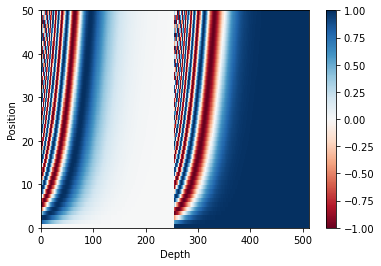

In [30]:
sample_pos_encoding = PositionalEncoding(50, 512)

plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

### 4-2)어텐션 정의 

닷-프로덕트 어텐션이 q*k의 유사도를 구하는 방법이였다면,

scaled_dot_product attention은 유사도를 특정값을 분모로 나눠주는 방식으로 유사도를 구한다. 


In [32]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
    matmul_qk = tf.matmul(query, key, transpose_b=True) #어텐션 가중치 계산 

  # scale matmul_qk # Q와 K를 곱해서 유사도를 구한다.
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth) #유사도를 특정값(차원)으로 나눠준다.

  # add the mask to zero out padding tokens
    if mask is not None:logits += (mask * -1e9)

  # 유사도를 0-1값으로 구하려고 softmax를 사용한다.
    attention_weights = tf.nn.softmax(logits, axis=-1)
  # 유사도와 v를 곱한다 = 어텐션 값
    output = tf.matmul(attention_weights, value)

    return output
print("슝=3")

슝=3


In [ ]:
사진추가 

In [33]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, name="multi_head_attention"):
        super(MultiHeadAttention, self).__init__(name=name)
        self.num_heads = num_heads
        self.d_model = d_model
        
        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

        #d_model을 num_head 개로 쪼갠다 
    def split_heads(self, inputs, batch_size):
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        query, key, value, mask = inputs['query'], inputs['key'], inputs[
            'value'], inputs['mask']
        batch_size = tf.shape(query)[0]

    # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

    # 병렬 연산을 위한 머리를 여러 개 만듭니다.
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

    # 스케일드 닷 프로덕트 어텐션 함수
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다.
        concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # final linear layer
        outputs = self.dense(concat_attention)

        return outputs
print("슝=3")

슝=3


### 마스킹
* 패딩 마스킹-짧은 문장에 0을 채워서 문장 길이를 맞춰주는 방법
* 0의 위치를 1로 체크해준다

In [34]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


In [35]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


* 룩 어헤드 마스킹

트랜스포머는 디코더는 현재 단어를 예측하고자 한다. 이때 문장행렬이 한번에 들어오면 위치에 집중해서 단어를 예측할 수 없기에 다음에 나올 단어는 가리는 기법을 사용한다.

In [36]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


In [37]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [38]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


## 인코더 하나의 레이어를 함수로 구현.

In [39]:
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

	# 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
    attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

    return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


#### 인코더층을 임베딩과 포지셔널 인코딩을 연결하고 인코더 층을 쌓아서 최종적인 인코더 만들기 

In [40]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")

	# 패딩 마스크 사용
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
    for i in range(num_layers):
        outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),)([outputs, padding_mask])
        
        return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


## 디코더 하나의 레이어를 함수로 구현

In [41]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

    attention1 = MultiHeadAttention(d_model, num_heads, name="attention_1")(inputs={
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': look_ahead_mask})

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
    attention2 = MultiHeadAttention(
        d_model, num_heads, name="attention_2")(inputs={
        'query': attention1,
        'key': enc_outputs,
        'value': enc_outputs,
        'mask': padding_mask})

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    attention2 = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    outputs = tf.keras.layers.LayerNormalization(
        epsilon=1e-6)(outputs + attention2)

    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
                          outputs=outputs,name=name)
print("슝=3")

슝=3


### 디코더 층을 쌓아 디코더 만들기

In [42]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')

	# 패딩 마스크
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
	# 임베딩 레이어
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

	# 포지셔널 인코딩
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

	# Dropout이라는 훈련을 돕는 테크닉을 수행
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name)
print("슝=3")

슝=3


## 트랜스포머 함수 정의

In [43]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

	# 인코더에서 패딩을 위한 마스크
    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask,
        output_shape=(1, None, None),
        name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None),
        name='dec_padding_mask')(inputs)

  # 인코더
    enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
    dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


## 모델 생성

In [44]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Model)                 (None, None, 256)    2607872     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

# 2. 손실 함수(Loss function)

In [45]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)
print("슝=3")

슝=3


# 3. 커스텀된 학습률(Learning rate)

In [46]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("슝=3")

슝=3


Text(0.5, 0, 'Train Step')

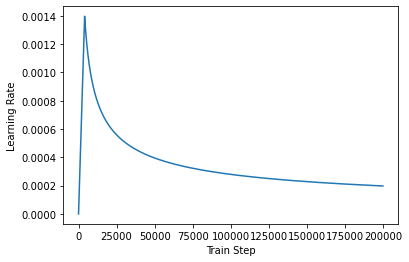

In [47]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

# 모델 컴파일

In [48]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)
model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

print("슝=3")

슝=3


# 훈련하기

In [55]:
EPOCHS = 30
model.fit(dataset, epochs=EPOCHS, verbose=1)

Train for 1 steps
Epoch 1/30
1/1 [==============================] - 0s 47ms/step - loss: 1.8468 - accuracy: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 50ms/step - loss: 1.8417 - accuracy: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 65ms/step - loss: 1.8494 - accuracy: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 59ms/step - loss: 1.8421 - accuracy: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 59ms/step - loss: 1.8407 - accuracy: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 59ms/step - loss: 1.8317 - accuracy: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 0s 67ms/step - loss: 1.8307 - accuracy: 0.0000e+00
Epoch 8/30
1/1 [==============================] - 0s 67ms/step - loss: 1.8394 - accuracy: 0.0000e+00
Epoch 9/30
1/1 [==============================] - 0s 56ms/step - loss: 1.8196 - accuracy: 0.0000e+00
Epoch 10/30
1/1 [==============================] - 0s 60ms/step - loss: 1

# Step 5. 모델 평가하기
Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

예측(inference) 단계는 기본적으로 다음과 같은 과정을 거칩니다.

    새로운 입력 문장에 대해서는 훈련 때와 동일한 전처리를 거친다.
    입력 문장을 토크나이징하고, START_TOKEN과 END_TOKEN을 추가한다.
    패딩 마스킹과 룩 어헤드 마스킹을 계산한다.
    디코더는 입력 시퀀스로부터 다음 단어를 예측한다.
    디코더는 예측된 다음 단어를 기존의 입력 시퀀스에 추가하여 새로운 입력으로 사용한다.
    END_TOKEN이 예측되거나 문장의 최대 길이에 도달하면 디코더는 동

In [56]:
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
    output_sequence = tf.expand_dims(START_TOKEN, 0)
    
    for i in range(MAX_LENGTH):
        predictions = model(inputs=[sentence, output_sequence], training=False)
        predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)
        
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
    return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


### 임의의 입력 문장에 대해서 decoder_inference() 함수를 호출하여 챗봇의 대답을 얻는 sentence_generation() 함수를 만듭니다.

In [57]:
def sentence_generation(sentence):
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode([i for i in prediction if i < tokenizer.vocab_size])
    print('입력 : {}'.format(sentence))
    print('출력 : {}'.format(predicted_sentence))
    return predicted_sentence
print("슝=3")

슝=3


In [58]:
sentence_generation('시험 잘 볼 수 있을까?')

시험 잘 볼 수 있을까 ? 
입력 : 시험 잘 볼 수 있을까?
출력 : 손으로 


'손으로 '

In [59]:
sentence_generation("이거 잘 안되는거지?")

이거 잘 안되는거지 ? 
입력 : 이거 잘 안되는거지?
출력 : 손으로 


'손으로 '

# 루브릭
1. 한국어 전처리를 통해 학습 데이터셋을 구축하였다.
	공백과 특수문자 처리, 토크나이징, 병렬데이터 구축의 과정이 적절히 진행되었다.

2. 트랜스포머 모델을 구현하여 한국어 챗봇 모델 학습을 정상적으로 진행하였다.
	구현한 트랜스포머 모델이 한국어 병렬 데이터 학습 시 안정적으로 수렴하였다.

3. 한국어 입력문장에 대해 한국어로 답변하는 함수를 구현하였다.
	한국어 입력문장에 그럴듯한 한국어로 답변을 리턴하였다.

In [ ]:
# 질문

인코더에서는 룩어헤드 마스킹을 안하는 이유는?

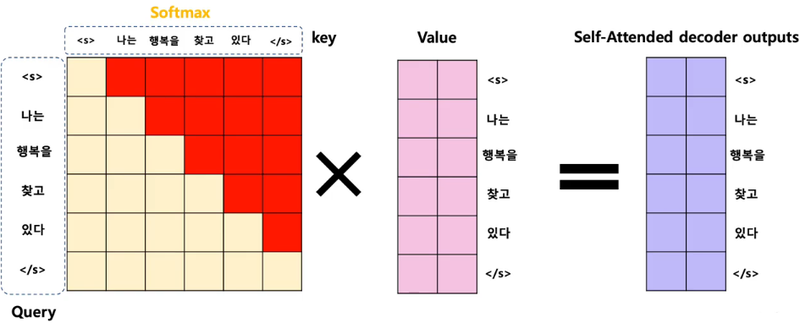
[출처: https://www.youtube.com/watch?v=xhY7m8QVKjo]